In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"processing/arenson/arenson_updated.dat")
data

28/11/24 - 13:57:00 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 57 data: 925, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

28/11/24 - 13:57:03 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
28/11/24 - 13:57:08 - pyGIMLi - INFO - Save RVector binary
28/11/24 - 13:57:08 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2338284238765559255
28/11/24 - 13:57:08 - pyGIMLi - INFO - Save RVector binary
28/11/24 - 13:57:08 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5786244969020597525


925 [16.829730029027168,...,16.77798480382033]

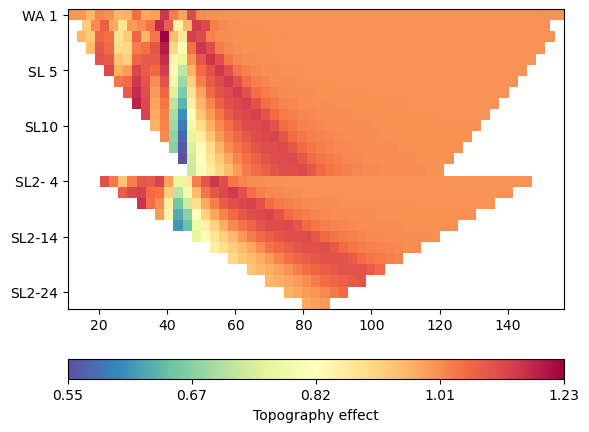

In [4]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1b216bc37d0>)

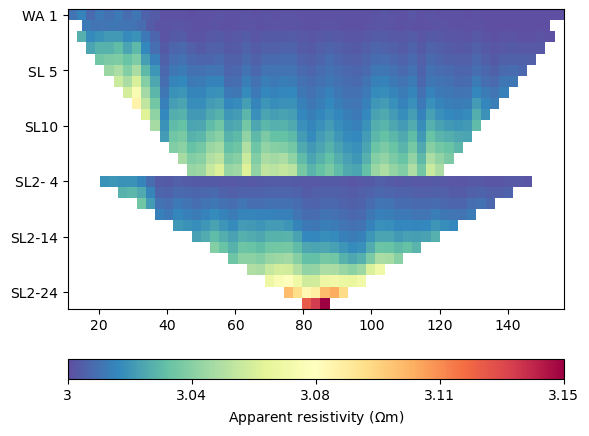

In [5]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1b217cabbd0>)

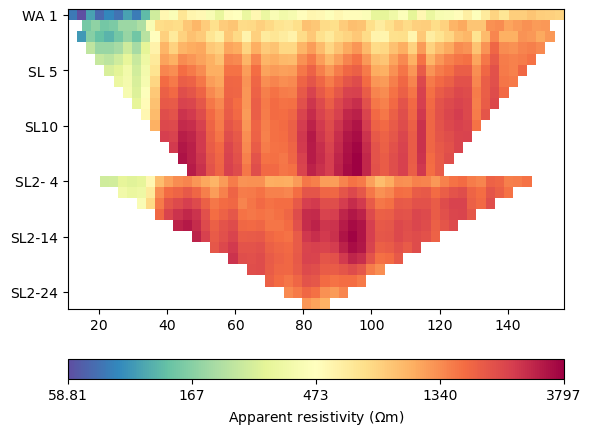

In [6]:
ert.showData(data)

06/09/24 - 09:41:27 - pyGIMLi - INFO - Use median(data values)=1628.574
06/09/24 - 09:41:27 - pyGIMLi - INFO - Created startmodel from forward operator: 924, min/max=1628.574000/1628.574000
06/09/24 - 09:41:27 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000022D28CA9120>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000022D28657AB0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000022D288D9260>
min/max (data): 58.81/3797
min/max (error): 3%/3.15%
min/max (start model): 1629/1629
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  551.44
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   89.54 (dPhi = 83.46%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   14.73 (dPhi = 80.53%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.53 (dPhi = 42.69%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.05 (dPhi = 35.11%) lam: 20.0
------------

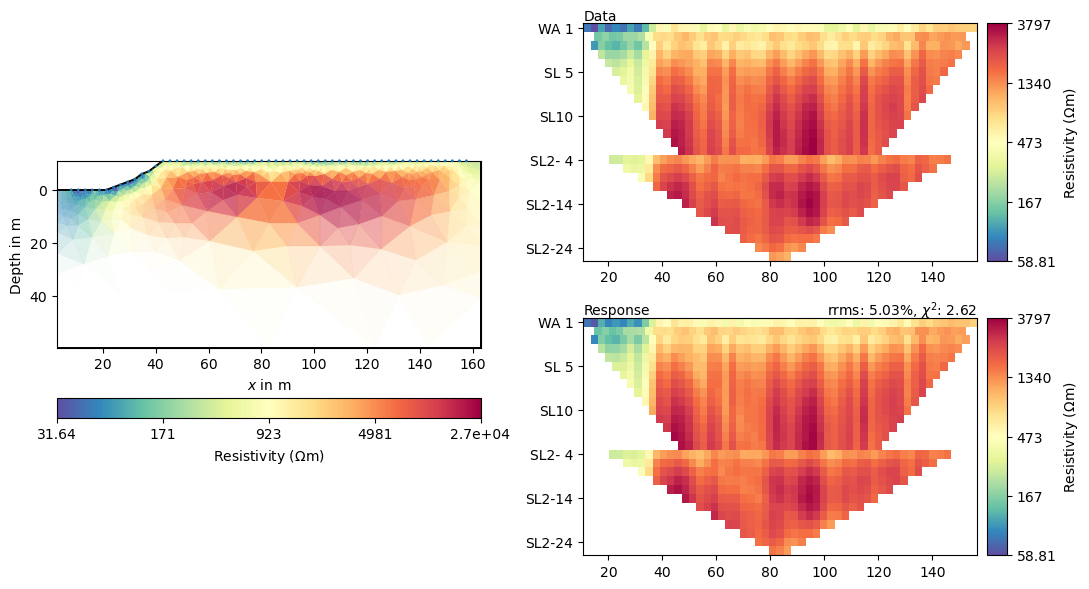

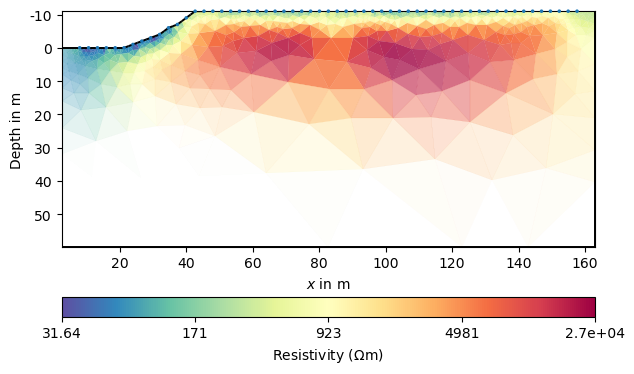

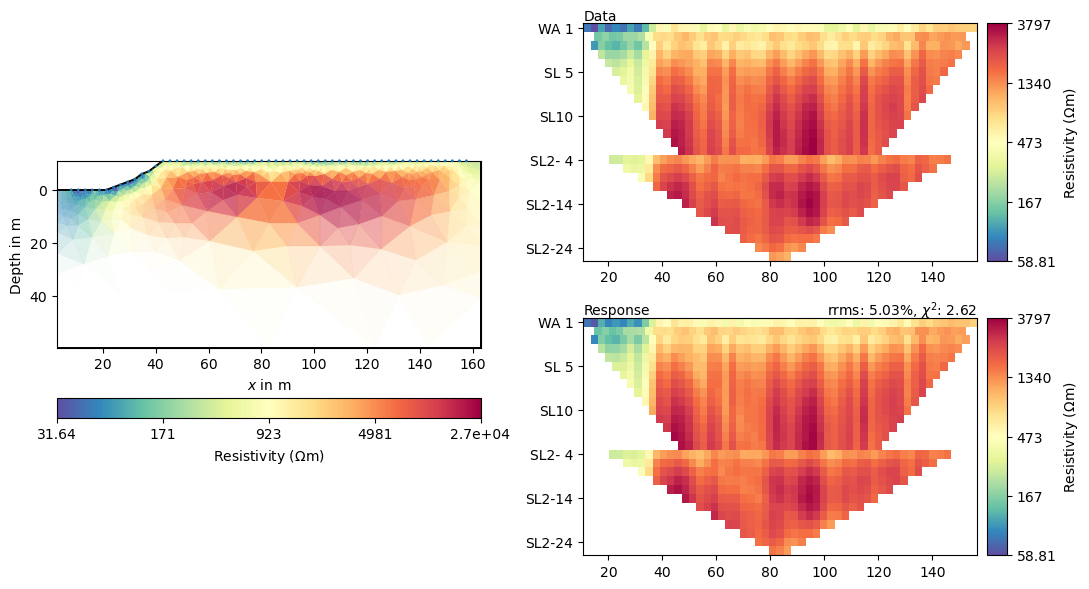

In [ ]:
mgr.invert(data, verbose=True, lam=20, paraDX = 0.25, paraDZ= 0.25, zWeight=0.5)

mgr.showResult()
mgr.showResultAndFit()

28/11/24 - 13:57:29 - pyGIMLi - INFO - Found 2 regions.
28/11/24 - 13:57:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
28/11/24 - 13:57:29 - pyGIMLi - INFO - Found 2 regions.
28/11/24 - 13:57:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
28/11/24 - 13:57:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
28/11/24 - 13:57:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
28/11/24 - 13:57:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3036 Cells: 5668 Boundaries: 4452
28/11/24 - 13:57:30 - pyGIMLi - INFO - Use median(data values)=1628.574
28/11/24 - 13:57:30 - pyGIMLi - INFO - Created startmodel from forward operator: 1206, min/max=1628.574000/1628.574000
28/11/24 - 13:57:30 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B24700E070>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B20AD17DD0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001B217E49620>
min/max (data): 58.81/3797
min/max (error): 3%/3.15%
min/max (start model): 1629/1629
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  550.84
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   97.46 (dPhi = 82.15%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   19.91 (dPhi = 78.29%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    8.90 (dPhi = 50.04%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.62 (dPhi = 59.14%) lam

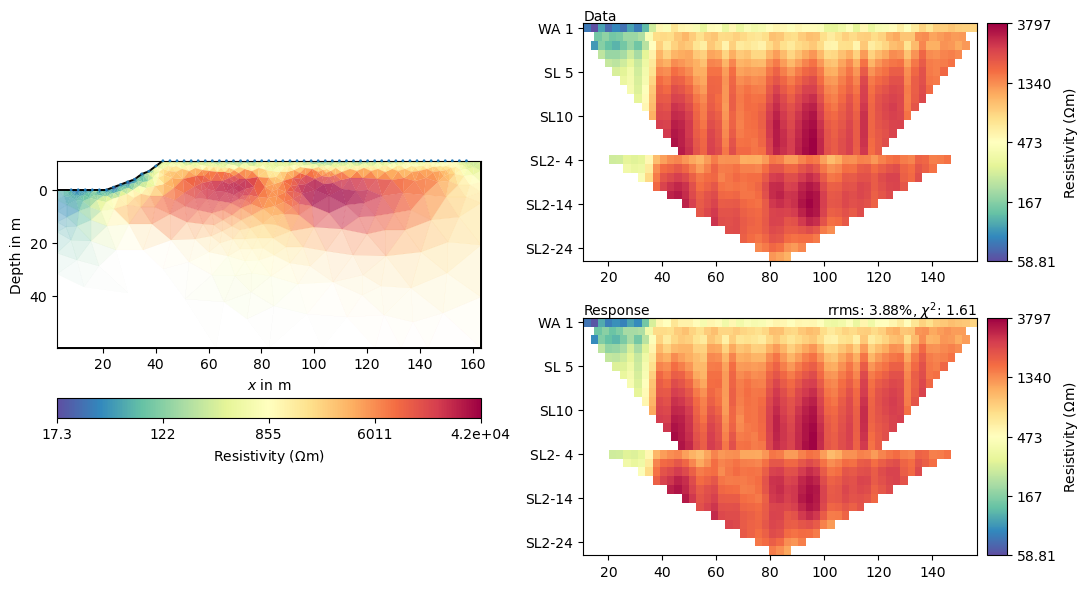

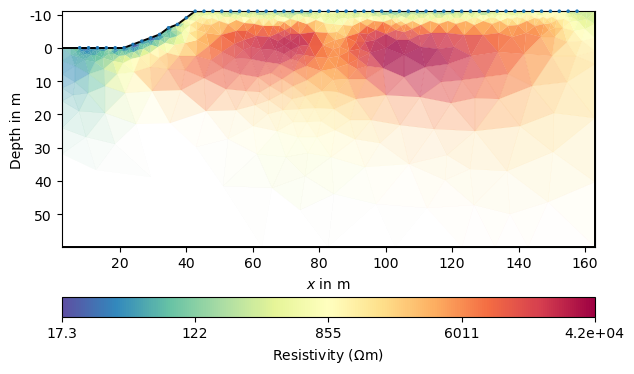

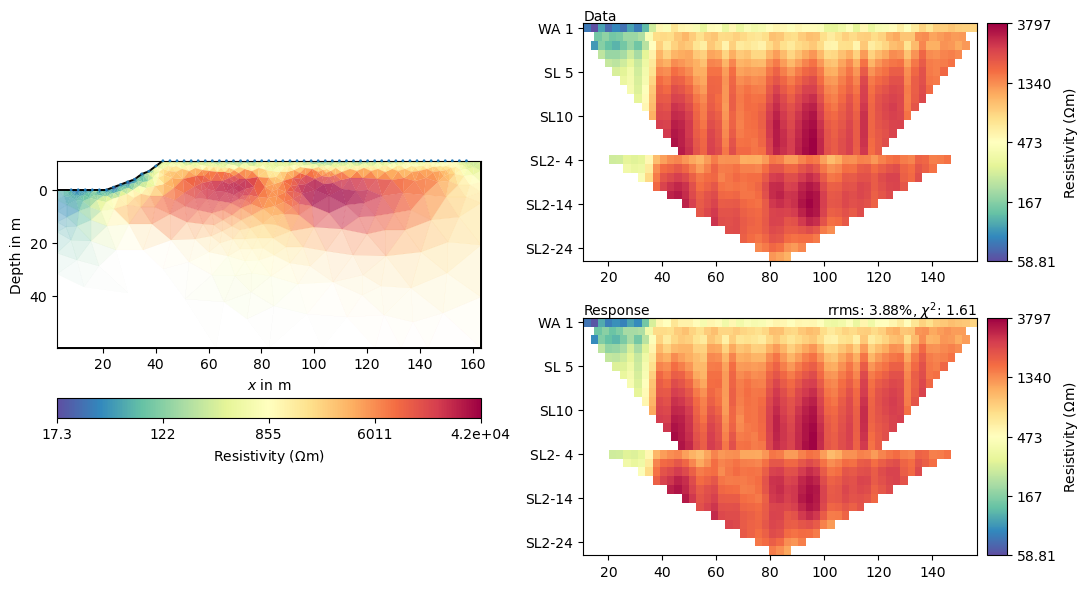

In [7]:
mgr.invert(data, verbose=True, lam=20, paraDX = 0.25, paraDZ= 0.25, zWeight=0.5)

mgr.showResult()
mgr.showResultAndFit()

02/12/24 - 09:31:50 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/arenson_updated\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/arenson_updated\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/arenson_updated\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

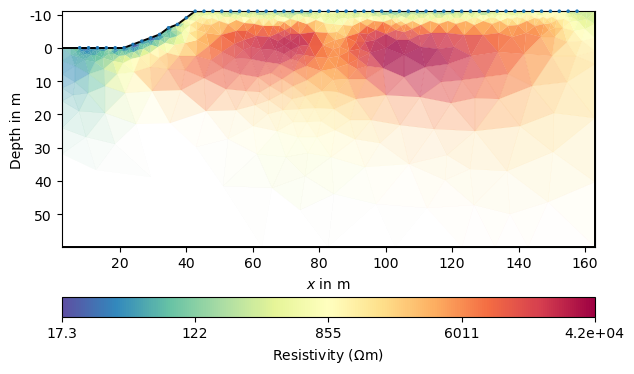

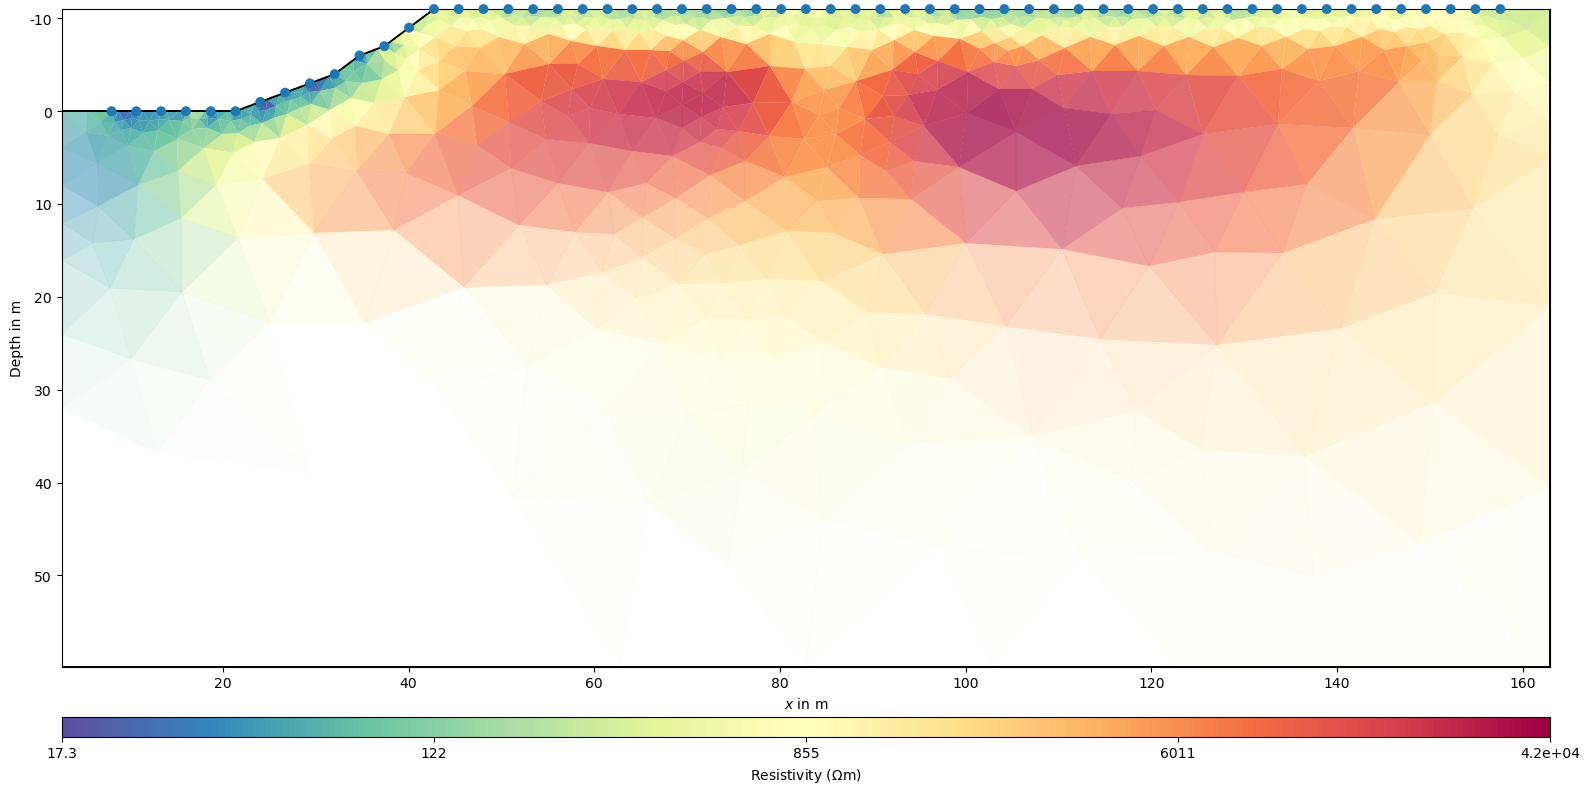

In [8]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/arenson_updated')